In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import GridSearchCV

In [307]:
bigmart_data = pd.read_csv('/content/drive/MyDrive/ML datasets/BigMart Sales Predictiom/Train.csv')
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [308]:
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical features:  
-Item_Identifier            
-Item_Fat_Content           
-Item_Type     
-Outlet_Identifier  
-Outlet_Size     
-Outlet_Location_Type       
-Outlet_Type                                                 

In [309]:
# Checking missing values
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling missing values
--> Mean: average value  
--> Mode: most repeated value

**Item_weight column:** In case of this column, we are going to use the mean value to replace the missing values. This method is called imputation.

**Outlet_Size** : As this column represents categorical features, we are going to use the mode instead of mean.              

In [310]:
# Handling missing values

#mean value of Item_weight column:
bigmart_data['Item_Weight'].mean()

12.857645184135976

In [311]:
#filling the missing values in Item_weight column
bigmart_data['Item_Weight'].fillna(bigmart_data['Item_Weight'].mean(), inplace = True)

In [312]:
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [313]:
bigmart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [314]:
#now for the categorical feature

mode_of_Outlet_size = bigmart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size)
# Explanation:
# we chose outlet size and outlet type because these are correlated. Still no idea on the other things of the code

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [315]:
missing_values = bigmart_data['Outlet_Size'].isnull()
print(missing_values)

# Now that we have the mode, we can fill up the missing values. Here True means missing value. so we gonna fillup those using mode

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [316]:
# replacing missing values
bigmart_data.loc[missing_values, 'Outlet_Size'] = bigmart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [317]:
bigmart_data['Outlet_Size'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [318]:
bigmart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

In [319]:
sns.set()

<ipython-input-320-e688b5cb1c74>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_data['Item_Weight'])


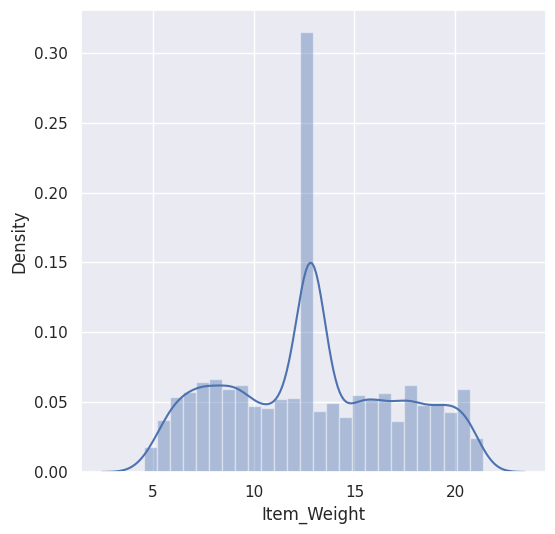

In [320]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_Weight'])
plt.show()

<ipython-input-321-61c304fde1aa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_data['Item_MRP'])


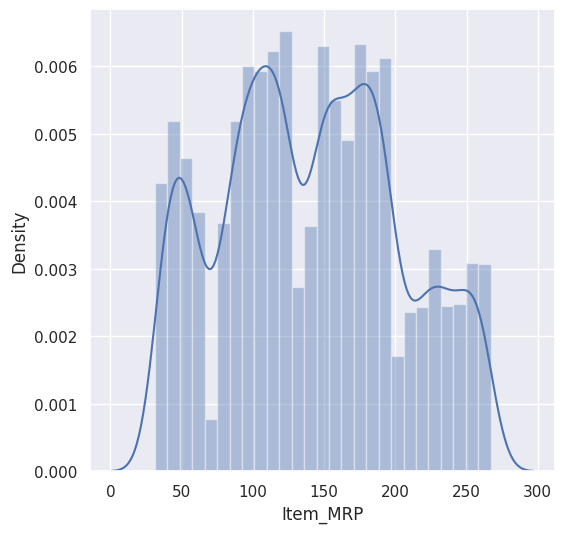

In [321]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_MRP'])
plt.show()

<ipython-input-322-fddb7c18ad20>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_data['Item_Outlet_Sales'])


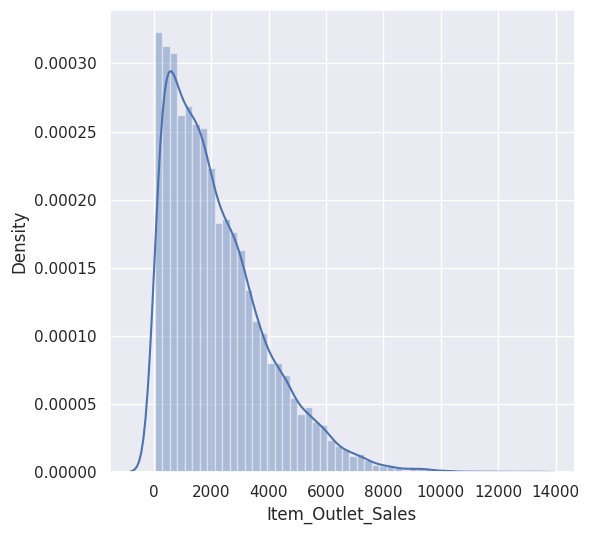

In [322]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_Outlet_Sales'])
plt.show()

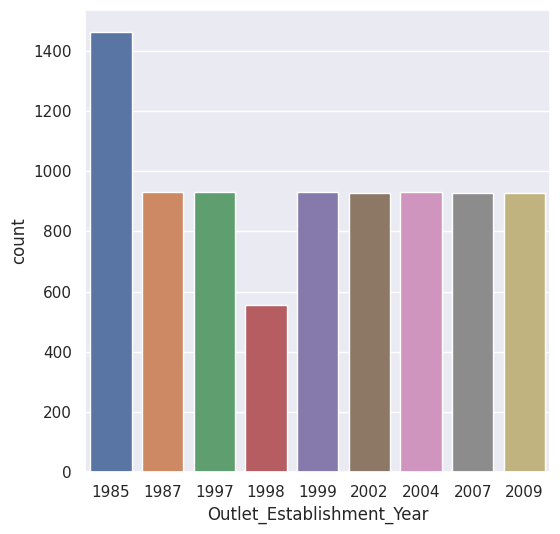

In [323]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = bigmart_data)
plt.show()

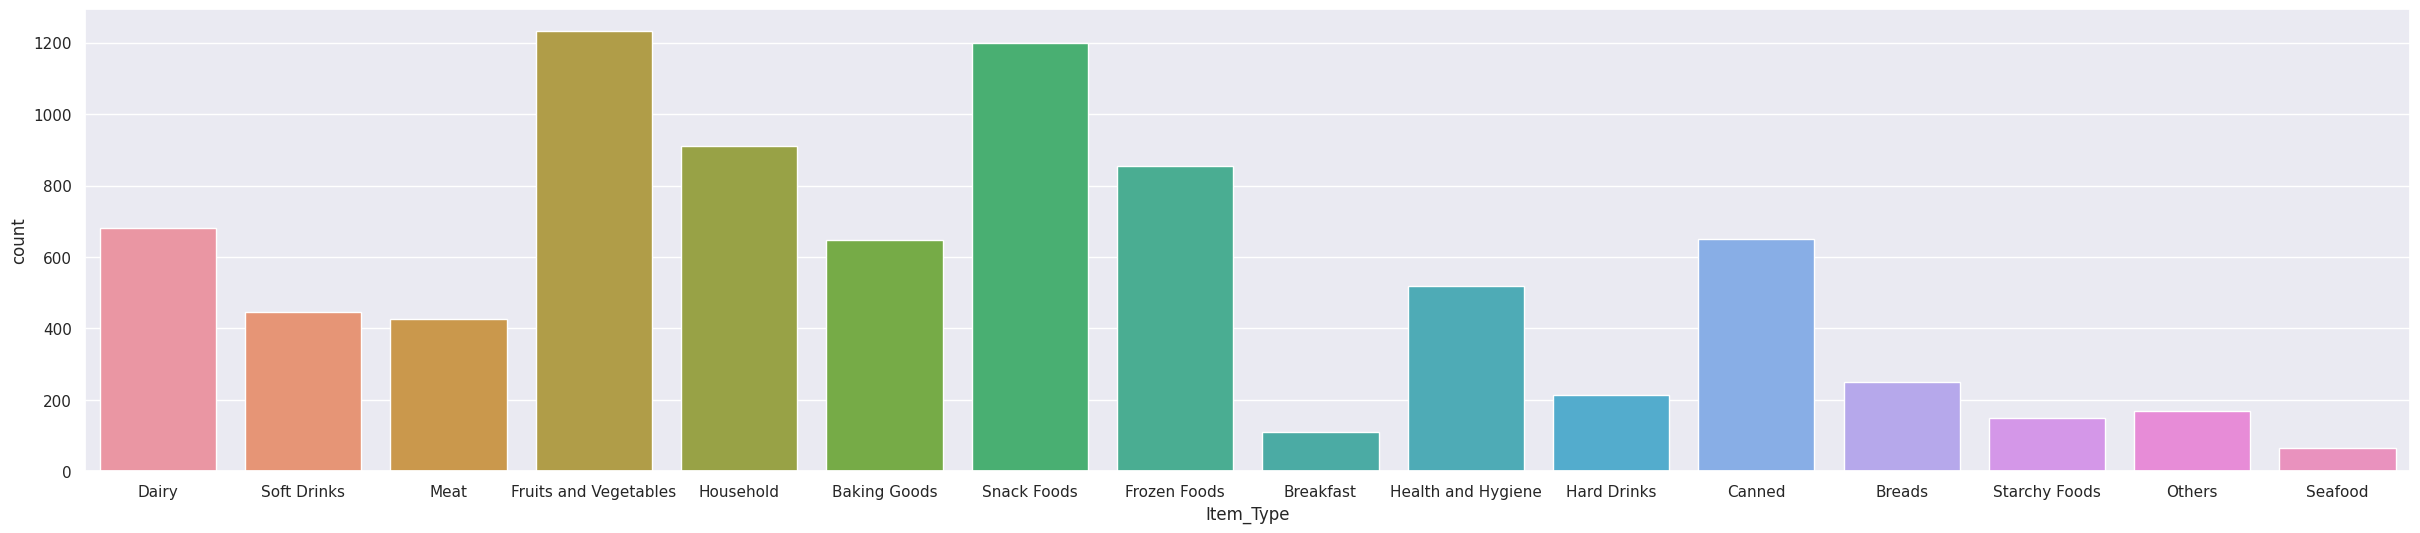

In [324]:
plt.figure(figsize=(30,6))
sns.countplot(x = 'Item_Type', data = bigmart_data)
plt.show()

In [325]:
bigmart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [326]:
# At first clean the data
bigmart_data.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace = True)
bigmart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [327]:
bigmart_data['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

# Label Encoding:
Converting the categorical or text data to numerical values.
Okayyy something interesting. Up until now, we manually changed the test values to numerical values right? NOT ANYMORE. there might be many values to change and for that we have encoder function, Label Encoder(The saviour). lets see how it works.


In [328]:
encoder = LabelEncoder()

In [329]:
bigmart_data['Item_Fat_Content'] = encoder.fit_transform(bigmart_data['Item_Fat_Content'])
bigmart_data['Item_Identifier'] = encoder.fit_transform(bigmart_data['Item_Identifier'])
bigmart_data['Item_Type'] = encoder.fit_transform(bigmart_data['Item_Type'])
bigmart_data['Outlet_Identifier'] = encoder.fit_transform(bigmart_data['Outlet_Identifier'])
bigmart_data['Outlet_Size'] = encoder.fit_transform(bigmart_data['Outlet_Size'])
bigmart_data['Outlet_Location_Type'] = encoder.fit_transform(bigmart_data['Outlet_Location_Type'])
bigmart_data['Outlet_Type'] = encoder.fit_transform(bigmart_data['Outlet_Type'])

In [330]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [331]:
# Splitting features and target
x = bigmart_data.drop('Item_Outlet_Sales', axis = 1)
y = bigmart_data['Item_Outlet_Sales']

In [332]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=3)

In [333]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [334]:
regressor = LinearRegression()

In [335]:
regressor.fit(x_train, y_train)
training_prediction = regressor.predict(x_train)
accuracy = metrics.r2_score(y_train,training_prediction )
print(accuracy)

0.49488122731532724


In [336]:
test_prediction = regressor.predict(x_test)
accuracy = metrics.r2_score(y_test,test_prediction )
print(accuracy)

0.5374902245127015


<function matplotlib.pyplot.show(close=None, block=None)>

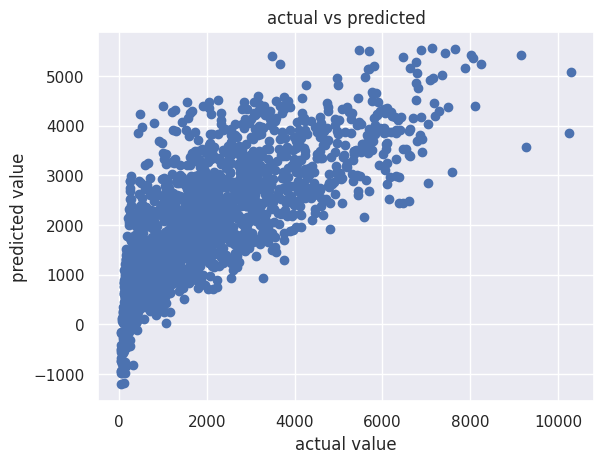

In [337]:
plt.scatter(y_test, test_prediction)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('actual vs predicted')
plt.show